In [44]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

## Datasets
Let’s load the CIFAR10 dataset, which contains color images of 10 different classes, like vehicles and animals.

Creating an object of type datasets.CIFAR10 will automatically download and load all images from the dataset. The resulting data structure can be treated as a list containing data samples and their corresponding labels.

In [5]:
cifar10_data = datasets.CIFAR10(
    root="'/Users/shafinsaapel/torch_data",
    download=True,
    transform=ToTensor() # transforms the images to tensor
)

100%|████████████████████████████████████████| 170M/170M [01:58<00:00, 1.44MB/s]


Extracting '/Users/shafinsaapel/torch_data/cifar-10-python.tar.gz to '/Users/shafinsaapel/torch_data


In [6]:
cifar10_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: '/Users/shafinsaapel/torch_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
# Print the number of samples in the loaded dataset
print(f"Number of samples: {len(cifar10_data)}")
print(f"Class names: {cifar10_data.classes}")

Number of samples: 50000
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [8]:
type(cifar10_data)

torchvision.datasets.cifar.CIFAR10

In [17]:
# shape of an example image
len(cifar10_data[0]), cifar10_data[0][0].shape

(2, torch.Size([3, 32, 32]))

In [18]:
# label for 1st example image
cifar10_data[0][1]

6

In [28]:
import random

In [30]:
# image from a random sample
sample = random.randint(0, len(cifar10_data))
image, label = cifar10_data[sample]
print(f"Label: {cifar10_data.classes[label]}")
print(f"Image size: {image.shape}")

Label: automobile
Image size: torch.Size([3, 32, 32])


Color images are modeled as 3 dimensional tensors. The first dimension corresponds to the channels (C) of the image (in this case we have RGB images). The second dimensions is the height (H) of the image and the third is the width (W). We can denote this image format as C x H x W

### Display an image from the dataset
Let’s try to display the image using matplotlib. The code below will not work, because imshow expects to have the image in a different format, i.e., C x H x W.

You need to reorder the dimensions of the tensor using the permute method of the tensor. PyTorch torch.permute(*dims) rearranges the original tensor according to the desired ordering and returns a new multidimensional rotated tensor. The size of the returned tensor remains the same as that of the original.

In [31]:
# create a tensor of size 2 x 4
input_var = torch.randn(2, 4)
# print its size and the tensor
print(input_var.size())
print(input_var)

# dimensions permuted
input_var = input_var.permute(1, 0)
# print its size and the permuted tensor
print(input_var.size())
print(input_var)

torch.Size([2, 4])
tensor([[ 0.9574,  0.0064,  0.7882, -0.5720],
        [ 1.1020,  1.6272,  0.0709,  0.3847]])
torch.Size([4, 2])
tensor([[ 0.9574,  1.1020],
        [ 0.0064,  1.6272],
        [ 0.7882,  0.0709],
        [-0.5720,  0.3847]])


In [33]:
import matplotlib.pyplot as plt

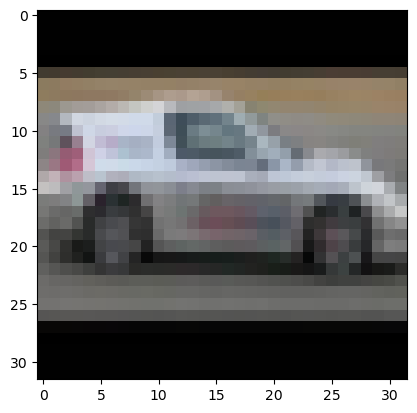

In [36]:
# TODO: Uncomment the following line to see the error that arises from the current image format
# plt.imshow(image)

# TODO: Comment the above line and fix this code by reordering the tensor dimensions
plt.imshow(image.permute(1,2,0))
plt.show()

In [38]:
cifar10_data.

[['data_batch_1', 'c99cafc152244af753f735de768cd75f'],
 ['data_batch_2', 'd4bba439e000b95fd0a9bffe97cbabec'],
 ['data_batch_3', '54ebc095f3ab1f0389bbae665268c751'],
 ['data_batch_4', '634d18415352ddfa80567beed471001a'],
 ['data_batch_5', '482c414d41f54cd18b22e5b47cb7c3cb']]

### Training and Test Datasets

When loading a dataset, you can specify if you want to load the training or the test samples using the train argument. We can load the training and test datasets separately. 

In [39]:
cifar10_data.root

"'/Users/shafinsaapel/torch_data"

In [57]:
traininig_data = datasets.CIFAR10(
    root="/Users/shafinsaapel/torch_data/cifar/",
    train = True,
    download = True,
    transform=ToTensor()
)

100%|████████████████████████████████████████| 170M/170M [00:58<00:00, 2.92MB/s]


Extracting /Users/shafinsaapel/torch_data/cifar/cifar-10-python.tar.gz to /Users/shafinsaapel/torch_data/cifar/


In [59]:
test_data = datasets.CIFAR10(
    root="/Users/shafinsaapel/torch_data/cifar/",
    train = False,
    download = True,
    transform=ToTensor()
)

Files already downloaded and verified


### Dataloader

Another important concept is the Dataloader. It is a wrapper around the Dataset that splits it into minibatches (important for training the neural network) and makes the data iterable. The shuffle argument is used to shuffle the order of the samples across the minibatches.

In [45]:
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Grayscale

In [48]:
# Create dataloader
train_dataloader = DataLoader(
    traininig_data,
    batch_size=64,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=64,
    shuffle=True
)

We can now query the next batch from the data loader and inspect it. For this we need to convert the dataloader object to a Python iterator using the function iter and then we can query the next batch using the function next.

In [50]:
# load the next batch
batch_images, batch_labels = next(iter(train_dataloader))

In [52]:
len(batch_images)

64

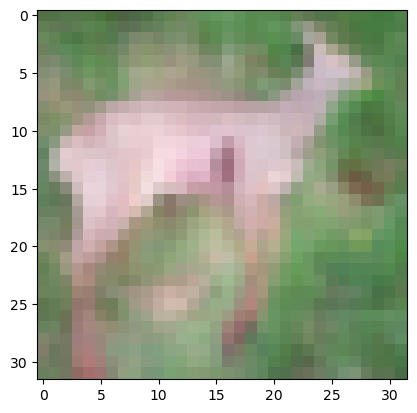

In [53]:
# display the first image of the batch
plt.imshow(batch_images[0].permute(1,2,0))
plt.show()

### Transformations

Another useful feature when loading a dataset is applying transformations on the data - color conversions, normalization, cropping, rotation etc. There are many predefined transformations in the torchvision.transforms package and you can also combine them using the Compose transform.

In [61]:
import numpy as np

In [62]:
def set_seed(seed=None, seed_torch=True):
    """
    Function that controls randomness. NumPy and random modules must be imported.
    
    Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.
    
    Returns:
    Nothing.
    """
    if seed is None:
        seed = np.random.choice(2 ** 32)
        
    random.seed(seed)
    np.random.seed(seed)
    
    if seed_torch:
        torch.manual_seed(seed)
        # torch.cuda.manual_seed_all(seed)
        # torch.cuda.manual_seed(seed)
        # torch.backends.cudnn.benchmark = False
        # torch.backends.cudnn.deterministic = True
    
    print(f'Random seed {seed} has been set.')

## Exercise: Load the CIFAR10 dataset as grayscale images
The goal of this excercise is to load the images from the CIFAR10 dataset as grayscale images. Note that we rerun the set_seed function to ensure reproducibility.

In [86]:
def my_data_load():
    """
    Function to load CIFAR10 data as grayscale images
    
    Args:
    None
    
    Returns:
    data: DataFrame
      CIFAR10 loaded Dataframe of shape (3309, 14)
    """
    ###############################################
    ## TODO for students: load the CIFAR10 data,
    ## but as grayscale images and not as RGB colored.
    # raise NotImplementedError("Student exercise: fill in the missing code to load the data")
    ###############################################
    ## TODO Load the CIFAR10 data using a transform that converts the images to grayscale tensors
    data = datasets.CIFAR10(
      root="/Users/shafinsaapel/torch_data/cifar/",
      download=True,
      transform=Compose([
          ToTensor(),
          Grayscale()
      ])
    )
    # Display a random grayscale image
    sample = random.randint(0, len(data))
    image, label = data[sample]
    print(f"Label: {data.classes[label]}")
    plt.imshow(image.squeeze(), cmap='gray')
    plt.show()
    return data


set_seed(seed=2021)

Random seed 2021 has been set.


Files already downloaded and verified
Label: horse


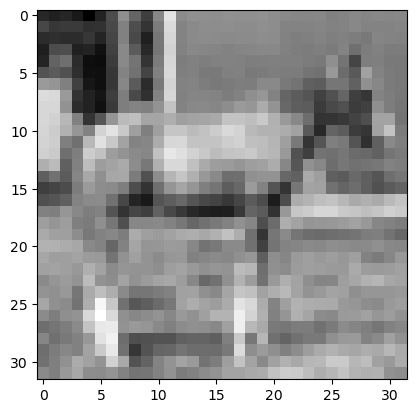

In [87]:
## After implementing the above code, uncomment the following lines to test your code
data = my_data_load()